# Importing Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

# Making numpy arrays x and y

In [2]:
#importing dataset
data = pd.read_csv('linear_train.csv')
x = data.iloc[:,1:-1].values

y = data.iloc[:,-1].values
y=y[np.newaxis,:]
y=y.T
y.shape

(50000, 1)

In [3]:
mu     = np.mean(x,axis=0)   
sigma  = np.std(x,axis=0) 
x_mean = (x - mu)
x_norm = (x - mu)/sigma

# Loading data

In [4]:
x_norm

array([[-0.99722997,  1.20760112,  0.64714173, ..., -0.42356685,
         0.14706176, -1.81833211],
       [-1.50051622,  2.00042615,  0.79297113, ...,  0.62858483,
        -0.831581  , -0.48062945],
       [-0.09112324, -0.44053485, -0.01483786, ...,  2.46960382,
         1.67742154,  0.74836542],
       ...,
       [-0.89224929,  0.2364157 ,  0.81271337, ..., -0.81131613,
         0.87977983, -1.42353235],
       [ 2.48439907,  0.26340108, -0.56973691, ...,  0.5299262 ,
         0.18599543, -1.12663502],
       [-0.94520481,  1.08626123, -1.06794097, ...,  0.28871003,
         0.57003263, -1.97345194]])

data = pd.read_csv('linear_train.csv')

In [5]:
data.head(10)

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,label
0,0,-284.685568,284.567363,18.462706,0.012380,-52.394580,-0.942413,6.746190,19.595626,554.989342,...,33.451992,-9.171214,528.122484,-1959.593876,-47.348529,767.129260,-12.001084,83.978055,737.317448,-218.016231
1,1,-428.480005,307.240676,22.632897,-0.099657,6.294685,30.440746,95.919775,-52.450992,-872.531179,...,14.848331,-33.556867,-569.261772,-2014.463089,20.042132,769.298704,18.057370,-55.521630,775.407458,154.140849
2,2,-25.800879,237.433758,-0.467505,-0.115813,-7.837079,21.598922,158.095089,2.554397,136.298244,...,-12.662449,28.956309,1069.504591,-1932.524770,18.419684,781.523541,70.652625,302.121708,810.402101,394.849701
3,3,-292.645787,249.444200,-3.661449,0.020113,-4.273514,21.421400,71.012817,49.089192,-444.041731,...,-1.741291,-65.225030,-35.017662,-1987.750883,32.222111,774.167118,-38.784611,-171.210149,793.225247,-83.932183
4,4,-264.114362,259.031693,-17.772049,-0.108774,6.512923,13.657296,78.446286,20.942401,-257.340694,...,17.309833,17.309769,-1086.046476,-2040.302324,22.900939,809.692581,-32.675473,104.996827,841.923375,-120.640357
5,5,193.344631,285.745726,-53.483941,-0.017641,18.593014,43.228310,45.982257,-36.031217,-292.831698,...,-8.554298,-21.241737,70.684480,-1982.465776,-20.491796,734.202958,-22.804325,45.142360,739.243447,-122.715251
6,6,-196.157827,230.929450,-37.963296,0.026508,-7.310071,27.125842,50.283765,-40.433601,-560.867299,...,12.137186,35.837688,-254.050647,-1998.702532,19.103373,780.219980,-19.118230,-6.279496,800.778228,-218.918438
7,7,-221.312494,248.416552,-7.247610,-0.033209,65.572977,7.208908,110.475807,51.075872,745.115034,...,13.538281,60.427038,-427.429079,-2007.371454,42.005396,780.706453,8.509696,30.153630,771.927299,251.717568
8,8,-417.965179,207.391605,-18.715778,0.103775,31.015769,25.873403,77.105235,21.191801,-287.193289,...,-24.407016,-0.483272,1030.660228,-1934.466989,-17.500545,754.965747,-11.484060,-234.197068,807.298291,-18.888337
9,9,29.154337,227.364910,-12.645949,0.184828,8.578613,13.176155,26.596283,-46.943673,-327.411015,...,-21.495758,12.276679,-284.589670,-2000.229483,2.498699,796.025435,-8.671056,120.375899,816.372055,-332.076822


In [6]:
m=len(data)
m

50000

In [7]:
m,n=x.shape

# Cost Function

In [8]:
def compute_cost(x_norm, y, w, b): 
                               
    f_wb = np.dot(x_norm, w) + b           
    cost = (f_wb - y) 
    cost = cost**2
    cost = cost / (2 * m)
    cost=np.sum(cost)
    
    return cost

# Gradient Descent

In [9]:
def compute_gradient(x_norm, y, w, b): 
   
    m,n = x_norm.shape           #(number of examples, number of features)
    y_hat = np.dot(x_norm,w) + b                      
    err = (y_hat - y)
    
    # dj_db
    dj_db = np.sum(err)
    dj_db = dj_db / m 
    
    #dj_dw
    
    dj_dw = (1/m)*(np.dot(x_norm.T, err))   
#     dj_dw+=(lambda_/m)*(np.sum(w))                               
        
    return dj_db, dj_dw

In [10]:
def gradient_descent(x_norm, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    J_history = []
    w_history = []
    
    w=w_in
    b = b_in
    
    for i in range(num_iters):

        
        dj_db,dj_dw = gradient_function(x_norm, y, w, b)   
            
        w = w - alpha * dj_dw
                    
        b = b - alpha * dj_db  
         # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x_norm, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing 

In [11]:
initial_w = np.zeros((n,1))
initial_b = 0
# some gradient descent settings
iterations = 1000
alpha = 0.01
# run gradient descent 
w_norm,b_norm,J_history, w_history = gradient_descent(x_norm ,y, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w_norm, b_norm)

Iteration    0: Cost 29785.03   
Iteration  100: Cost  7772.89   
Iteration  200: Cost  5168.19   
Iteration  300: Cost  4823.44   
Iteration  400: Cost  4777.02   
Iteration  500: Cost  4770.75   
Iteration  600: Cost  4769.90   
Iteration  700: Cost  4769.79   
Iteration  800: Cost  4769.77   
Iteration  900: Cost  4769.77   
w,b found by gradient descent: [[72.99303967]
 [66.2462989 ]
 [97.43781341]
 [ 1.71748798]
 [17.36249444]
 [24.8151892 ]
 [71.23054984]
 [30.99418132]
 [20.34966567]
 [93.74479786]
 [39.36753471]
 [37.25371   ]
 [ 2.82789698]
 [40.70112191]
 [40.70112191]
 [46.08531179]
 [21.51532525]
 [33.8443092 ]
 [33.68222527]
 [39.24676413]] -0.365634949332811


In [12]:
compute_cost(x_norm, y, w=w_norm, b=b_norm)

4769.768749133481

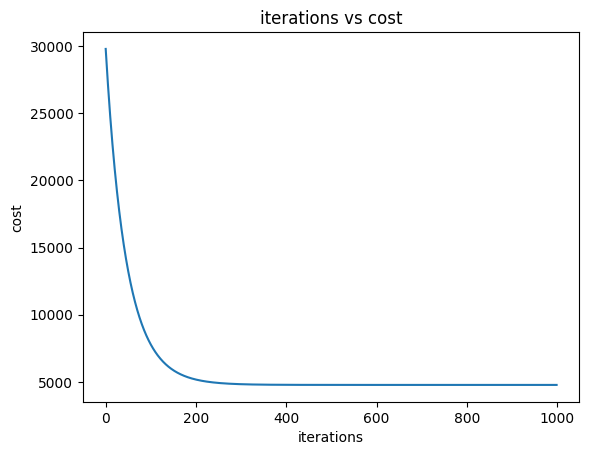

In [13]:
t = np.arange(0, iterations)
plt.plot(t,J_history )
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("iterations vs cost")

plt.show()

# RMSE and R2 score

In [14]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / (m))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = np.dot(x_norm, w_norm) + b_norm

print("RMSE")
print(rmse(y, Y_pred))
print("R2 Score")
print(r2_score(y, Y_pred))

RMSE
[97.67055594]
R2 Score
[0.84287832]


# Predicting labels and saving csv file

In [15]:
#importing dataset
data_pred = pd.read_csv('linear_test_data.csv')
x_test= data_pred.iloc[:,1:21].values

In [16]:
mu     = np.mean(x_test,axis=0)   
sigma  = np.std(x_test,axis=0) 
x_test_norm = (x_test - mu)/sigma
x_test_norm.shape

(20000, 20)

In [17]:
y_pred=np.dot(x_test_norm, w_norm) + b_norm

In [18]:
y_pred.shape

(20000, 1)

In [19]:
data_pred.insert(0,'label',y_pred)

In [20]:
#saving the dataframe as a csv file
data_pred.to_csv('linear_test_data_pred.csv',index=False)